<h2 style='text-align: center;'> Data Science Technology and Systems </h2>
<h3 style='text-align: center;'> Final Assignment: Predicting Airplane Delays </h3>
<h3 style='text-align: center;'> Part A – Onpremises </h3>
<h4 style='text-align: center;'> Pauline Armamento - u3246782 </h4>

# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this link: [https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/Er0nVreXmihEmtMz5qC5kVIB81-ugSusExPYdcyQTglfLg?e=bNO312]. Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following link: [https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ]. 

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents. 


### 1. Determine if and why ML is an appropriate solution to deploy.

Machine learning (ML) is an appropriate solution for this problem because it involves analyzing complex relationships, and large amounts of historical flight and weather data to predict future flight delays. 

#### Complex Relationships
Flight delays are influenced by various factors, including weather patterns, air traffic congestion, and mechanical issues. Traditional statistical models may struggle to capture the intricate interdependencies among these variables. ML algorithms, however, are well-equipped to discern nonlinear relationships and patterns within complex data.

#### Large Data Volume
The dataset comprises several years of historical flight and weather data, a substantial quantity that would be challenging to analyze using traditional methods. ML algorithms, on the other hand, are designed to process and learn from vast datasets, extracting valuable insights that might be overlooked by human analysts.

#### Improve Predictions
As more data becomes available, ML models can continuously refine their predictions through a process of iterative learning. This adaptive nature enables ML models to potentially outperform static models, delivering more accurate and reliable forecasts over time.

#### Scalability
As the travel booking website expands, the ML model can be readily scaled to accommodate increasing workloads. This scalability ensures that the model remains effective and efficient even as the volume of flight searches and predictions grows.


### 2. Formulate the business problem, success metrics, and desired ML output.

#### Business Problem: 
The company aims to transform customer experience by predicting the likelihood of a flight delay based on weather conditions before a customer books a flight to or from the busiest airports in the US. By providing this foresight, travelers can make informed booking decisions, potentially avoiding delays and reducing travel disruptions.

#### Business Metric: 
Our primary success metric is the accuracy of the ML model's predictions. Reaching an accuracy of 85% or higher in predicting weather-related delays would be a significant achievement. Additionally, we would also consider precision which measures the proportion of positive predictions that are actually correct. This metric is useful for evaluating the model's ability to avoid false positives. Next, we want to consider recall which measures the proportion of actual positive cases that are correctly identified by the model. This metric is useful for evaluating the model's ability to avoid false negatives. Finally, we want to check for F1-score that calculates the harmonic mean of precision and recall. This metric provides a balanced evaluation of both metrics.

#### ML Output: 
The desired output from the ML model is a binary classification indicating whether a flight is likely to be delayed or on time based on the prevailing weather conditions. This classification will inform the company's customer service operations and be integrated into the travel booking website, empowering customers with valuable pre-booking insights. By providing travelers with accurate predictions of potential flight delays, the company can enhance the overall customer experience and foster greater satisfaction.

### 3. Identify the type of ML problem you’re dealing with.

This scenario falls under the category of supervised classification.  The model will be trained on historical data containing labeled examples (flights categorized as delayed or not delayed) along with associated features like weather conditions and flight information.  The model will then learn to map these features to a binary outcome:

1 - Indicates the flight is likely to be delayed due to weather. 

0 - Indicates the flight is unlikely to be delayed due to weather.

By analyzing various features and their interactions, the model aims to classify future flights and predict potential weather-related delays with a high degree of accuracy.

### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [157]:
import os
from pathlib2 import Path
from zipfile import ZipFile
import time

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# <please add any other library or function you are aiming to import here>

import zipfile
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc



# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features? 

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

In [63]:
# download the files

# <note: make them all relative, absolute path is not accepted>
zip_path = 'data_compressed'
base_path = '.'
csv_base_path = 'extracted_files'

os.makedirs(csv_base_path, exist_ok=True)

In [41]:
# How many zip files do we have? write a code to answer it.

# Check if the directory exists
if os.path.exists(zip_path):
    # List all files in the directory and filter for zip files
    files = os.listdir(zip_path)
    zip_files = [file for file in files if file.endswith('.zip')]
    
    # Count the number of zip files
    zip_file_count = len(zip_files)
    print(f"Number of zip files: {zip_file_count}")
else:
    print(f"The directory '{zip_path}' does not exist.")


Number of zip files: 60


#### Extract CSV files from ZIP files

In [42]:
import zipfile

def zip2csv(zipFile_name , file_path):
    """
    Extract csv from zip files
    zipFile_name: name of the zip file
    file_path : name of the folder to store csv
    """

    try:
        with ZipFile(zipFile_name, 'r') as z: 
            print(f'Extracting {zipFile_name} ') 
            z.extractall(path=file_path) 
    except:
        print(f'zip2csv failed for {zipFile_name}')

# Get list of all zip files in the data_compressed directory
zip_files = [os.path.join(zip_path, file) for file in os.listdir(zip_path) if file.endswith('.zip')]

        
for file in zip_files:
    zip2csv(file, csv_base_path)

print("Files Extracted")

Extracting data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip 
Extracting data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_10.zip 
Extracting data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_11.zip 
Extracting data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12.zip 
Extracting data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip 
Extracting data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_3.zip 
Extracting data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_4.zip 
Extracting data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_5.zip 
Extracting data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_6.zip 
Extracting data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_7.zip 
Extracting data_c

In [43]:
# How many csv files have we extracted? write a code to answer it.

# Check if the directory exists
if os.path.exists(csv_base_path):
    # List all files in the directory and filter for csv files
    extracted_files = os.listdir(csv_base_path)
    csv_files = [file for file in extracted_files if file.endswith('.csv')]
    
    # Count the number of csv files
    csv_file_count = len(csv_files)
    print(f"Number of CSV files extracted: {csv_file_count}")
else:
    print(f"The directory '{csv_base_path}' does not exist.")

Number of CSV files extracted: 60


Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [219]:
from IPython.display import IFrame

IFrame(src=os.path.relpath(f"{csv_base_path}/readme.html"), width=1000, height=600)

#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [45]:
df_temp = pd.read_csv("extracted_files/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_1.csv")

**Question**: Print the row and column length in the dataset, and print the column names.

In [46]:
df_shape = df_temp.shape
print(f'Rows and columns in one csv file is {df_shape}')

Rows and columns in one csv file is (471949, 110)


**Question**: Print the first 10 rows of the dataset.  

In [47]:
df_temp.head(10)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2014,1,1,30,4,2014-01-30,AA,19805,AA,N006AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,1,1,31,5,2014-01-31,AA,19805,AA,N003AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,1,1,1,3,2014-01-01,AA,19805,AA,N002AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,1,1,2,4,2014-01-02,AA,19805,AA,N002AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,1,1,3,5,2014-01-03,AA,19805,AA,N014AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2014,1,1,4,6,2014-01-04,AA,19805,AA,N010AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2014,1,1,5,7,2014-01-05,AA,19805,AA,N011AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2014,1,1,6,1,2014-01-06,AA,19805,AA,N002AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2014,1,1,7,2,2014-01-07,AA,19805,AA,N012AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2014,1,1,8,3,2014-01-08,AA,19805,AA,N014AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [48]:
print(f'The column names are :')
print('#########')
for col in df_temp.columns:
    print(col)

The column names are :
#########
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1

**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not. 

For example: `5 in [1,2,3,4,5]`

In [49]:
# Print all columns that contain the word 'Del'
del_columns = [x for x in df_temp.columns if 'Del' in x]

# Output the columns
print('Columns containing the word "Del":')
print('#########################')
for x in del_columns:
    print(x)


Columns containing the word "Del":
#########################
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
DivArrDelay


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [50]:
# Get the number of rows and columns
num_rows, num_columns = df_temp.shape  # shape returns (rows, columns)

# Get the number of years from the dataset
years_in_dataset = df_temp['Year'].unique()

# Get the months covered in the dataset
months_in_dataset = df_temp['Month'].unique()

# Get the date range for the dataset
df_temp['FlightDate'] = pd.to_datetime(df_temp['FlightDate']) #Assign 'FlightDate' into date format
date_range_min = df_temp['FlightDate'].min()  # Minimum date
date_range_max = df_temp['FlightDate'].max()  # Maximum date

# Get the airlines covered in the dataset
airlines_covered = df_temp['Reporting_Airline'].unique() 

# Get the origin airports covered in the dataset
origin_airports = df_temp['Origin'].unique()  

# Get the destination airports covered in the dataset
destination_airports = df_temp['Dest'].unique()  

# Print the results
print("The #rows and #columns are ", num_rows, " and ", num_columns)
print("The years in this dataset are: ", years_in_dataset)
print("The months covered in this dataset are: ", months_in_dataset)
print("The date range for data is: ", date_range_min, " to ", date_range_max)
print("The airlines covered in this dataset are: ", list(airlines_covered))
print("The Origin airports covered are: ", list(origin_airports))
print("The Destination airports covered are: ", list(destination_airports))


The #rows and #columns are  471949  and  110
The years in this dataset are:  [2014]
The months covered in this dataset are:  [1]
The date range for data is:  2014-01-01 00:00:00  to  2014-01-31 00:00:00
The airlines covered in this dataset are:  ['AA', 'AS', 'DL', 'EV', 'B6', 'F9', 'FL', 'HA', 'MQ', 'US', 'OO', 'VX', 'WN', 'UA']
The Origin airports covered are:  ['DFW', 'ICT', 'MIA', 'BLI', 'PDX', 'OGG', 'OAK', 'SMF', 'KOA', 'HNL', 'SJC', 'SEA', 'SAN', 'LIH', 'ANC', 'DCA', 'EWR', 'LAX', 'MCO', 'BOS', 'ORD', 'FLL', 'MSP', 'PHL', 'BET', 'ADQ', 'SCC', 'BRW', 'FAI', 'KTN', 'JNU', 'CDV', 'YAK', 'SIT', 'PSG', 'WRG', 'OME', 'OTZ', 'PHX', 'SFO', 'PSP', 'SNA', 'BUR', 'ONT', 'LAS', 'TUS', 'AUS', 'DEN', 'SAT', 'GEG', 'SLC', 'IAH', 'ATL', 'STL', 'MCI', 'ADK', 'CVG', 'BOI', 'VPS', 'SDF', 'PBI', 'LGA', 'JFK', 'CHS', 'BNA', 'BTR', 'BHM', 'ECP', 'TPA', 'RSW', 'DTW', 'BWI', 'CAE', 'MKE', 'CLE', 'CMH', 'MEM', 'ALB', 'COS', 'MSN', 'BDL', 'FSD', 'GSP', 'JAN', 'PNS', 'FAY', 'CLT', 'HRL', 'IAD', 'AGS', 'BUF

**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [51]:
counts = pd.DataFrame({'Origin': df_temp['Origin'].value_counts(),
    'Destination': df_temp['Dest'].value_counts()})
counts

,Origin,Destination
ABE,135,137
ABI,243,244
ABQ,1910,1909
ABR,62,62
ABY,89,89
...,...,...
VPS,402,401
WRG,62,62
XNA,826,831
YAK,60,60


**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [52]:
counts.sort_values(by=['Origin'],ascending=False).head(15)

,Origin,Destination
ATL,30796,30784
DFW,23488,23482
ORD,21497,21529
LAX,18481,18474
DEN,17977,17955
IAH,14581,14569
SFO,13550,13539
PHX,13343,13335
LAS,11050,11052
CLT,9768,9777


**Question**: Given all the information about a flight trip, can you predict if it would be delayed?

Yes, the available data on flight trips encompassing departure and arrival times, flight distances, airline, origin and destination airports, dates: Year, Month, Flight Date, and past delay data, we can construct a predictive model designed to estimate the probability of flight delays.

Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe 

In [75]:
def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name):
    """
    Combine csv files into one Data Frame
    csv_files: list of csv file paths
    filter_cols: list of columns to filter
    subset_cols: list of columns to subset rows
    subset_vals: list of list of values to subset rows
    file_name: name of the output file to save the combined dataframe
    """
    # Create an empty dataframe
    df = pd.DataFrame(columns=filter_cols)
    
    # Iterate through each csv_files
    for csv_file in csv_files:
        
        # Load each csv file
        temp_df = pd.read_csv(csv_file)
        
        # Select columns
        temp_df = temp_df[filter_cols]
        
        # Subset values
        for i in range(len(subset_cols)):
            temp_df = temp_df[temp_df[subset_cols[i]].isin(subset_vals[i])]
        
        # Concatenate dataframes
        df = pd.concat([df, temp_df], ignore_index=True) 
        
    # Save the combined dataframe to csv file
    df.to_csv(file_name, index=False)
    
    return df


In [76]:
#cols is the list of columns to predict Arrival Delay 
cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
        'Reporting_Airline','Origin','OriginState','Dest','DestState',
        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',
        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']

subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

# subset_vals is a list collection of the top origin and destination airports and top 5 airlines
subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['UA', 'OO', 'WN', 'AA', 'DL']]

Use the function above to merge all the different files into a single file that you can read easily. 

**Note**: This will take 5-7 minutes to complete.

In [77]:
start = time.time()

# Define path
combined_csv_filename = f"{base_path}/combined_files.csv"

# Check if the combined csv file already exists
if not os.path.exists(combined_csv_filename):
    # Make a directory to store the combined csv file
    Path(base_path).mkdir(parents=True, exist_ok=True)

    # List all csv files
    csv_files = [os.path.join(csv_base_path, f) for f in os.listdir(csv_base_path) if f.endswith('.csv')]
    
    # Call combine_csv
    combined_df = combine_csv(csv_files, cols, subset_cols, subset_vals, combined_csv_filename)
    
    # Save combined dataframe to csv file
    combined_df.to_csv(combined_csv_filename, index=False)
else:
    # If the combined file already exists, read it
    combined_df = pd.read_csv(combined_csv_filename)

# Print the time taken for merging the csv files
print(f'CSV files merged in {round((time.time() - start)/60, 2)} minutes')

CSV files merged in 3.71 minutes


#### Load dataset

Load the combined dataset.

In [168]:
data = pd.read_csv(combined_csv_filename)

In [222]:
data.shape

(1635590, 86)

Print the first 5 records.

In [113]:
 data.head(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,ArrDel15,AirTime
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,TX,2145,0.0,0.0,689.0,3,-20.0,0.0,0.0,99.0
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,GA,945,0.0,0.0,731.0,3,-3.0,0.0,0.0,98.0
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,CO,1855,0.0,0.0,1199.0,5,-7.0,0.0,0.0,174.0
3,2014,1,1,26,7,2014-01-26,DL,ATL,GA,PHX,AZ,1634,0.0,0.0,1587.0,7,-4.0,0.0,0.0,233.0
4,2014,1,1,26,7,2014-01-26,DL,PHX,AZ,ATL,GA,700,0.0,0.0,1587.0,7,-13.0,0.0,0.0,179.0


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [122]:
# Get the number of rows and columns
num_rows, num_columns = data.shape  # shape returns (rows, columns)

# Get the number of years from the dataset
years_in_dataset = data['Year'].unique()

# Get the months covered in the dataset
months_in_dataset = data['Month'].unique()

# Get the date range for the dataset
data['FlightDate'] = pd.to_datetime(data['FlightDate']) #Assign 'FlightDate' into date format
date_range_min = data['FlightDate'].min()  # Minimum date
date_range_max = data['FlightDate'].max()  # Maximum date

# Get the airlines covered in the dataset
airlines_covered = data['Reporting_Airline'].unique() 

# Get the origin airports covered in the dataset
origin_airports = data['Origin'].unique()  

# Get the destination airports covered in the dataset
destination_airports = data['Dest'].unique()  

# Print the results
print("The #rows and #columns are ", num_rows, " and ", num_columns)
print("The years in this dataset are: ", years_in_dataset)
print("The months covered in this dataset are: ", months_in_dataset)
print("The date range for data is: ", date_range_min, " to ", date_range_max)
print("The airlines covered in this dataset are: ", list(airlines_covered))
print("The Origin airports covered are: ", list(origin_airports))
print("The Destination airports covered are: ", list(destination_airports))


The #rows and #columns are  1658130  and  20
The years in this dataset are:  [2014 2015 2016 2017 2018]
The months covered in this dataset are:  [ 1 10 11 12  2  3  4  5  6  7  8  9]
The date range for data is:  2014-01-01 00:00:00  to  2018-12-31 00:00:00
The airlines covered in this dataset are:  ['DL', 'OO', 'WN', 'UA', 'AA']
The Origin airports covered are:  ['ATL', 'DFW', 'PHX', 'DEN', 'IAH', 'CLT', 'SFO', 'LAX', 'ORD']
The Destination airports covered are:  ['IAH', 'ATL', 'DEN', 'PHX', 'CLT', 'LAX', 'DFW', 'SFO', 'ORD']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [169]:
data.rename(columns={'ArrDel15':'is_delay'}, inplace=True)

Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [170]:
data.isnull().sum(axis=0)

Year                     0
Quarter                  0
Month                    0
DayofMonth               0
DayOfWeek                0
FlightDate               0
Reporting_Airline        0
Origin                   0
OriginState              0
Dest                     0
DestState                0
CRSDepTime               0
Cancelled                0
Diverted                 0
Distance                 0
DistanceGroup            0
ArrDelay             22540
ArrDelayMinutes      22540
is_delay             22540
AirTime              22540
dtype: int64

The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

In [171]:
### Remove null columns
data = data[~data['is_delay'].isnull()]
data

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,is_delay,AirTime
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,TX,2145,0.0,0.0,689.0,3,-20.0,0.0,0.0,99.0
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,GA,945,0.0,0.0,731.0,3,-3.0,0.0,0.0,98.0
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,CO,1855,0.0,0.0,1199.0,5,-7.0,0.0,0.0,174.0
3,2014,1,1,26,7,2014-01-26,DL,ATL,GA,PHX,AZ,1634,0.0,0.0,1587.0,7,-4.0,0.0,0.0,233.0
4,2014,1,1,26,7,2014-01-26,DL,PHX,AZ,ATL,GA,700,0.0,0.0,1587.0,7,-13.0,0.0,0.0,179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658125,2018,3,9,11,2,2018-09-11,WN,DEN,CO,PHX,AZ,1105,0.0,0.0,602.0,3,-18.0,0.0,0.0,87.0
1658126,2018,3,9,11,2,2018-09-11,WN,DEN,CO,SFO,CA,825,0.0,0.0,967.0,4,-8.0,0.0,0.0,133.0
1658127,2018,3,9,11,2,2018-09-11,WN,DEN,CO,SFO,CA,1240,0.0,0.0,967.0,4,17.0,17.0,1.0,141.0
1658128,2018,3,9,11,2,2018-09-11,WN,DEN,CO,SFO,CA,2210,0.0,0.0,967.0,4,2.0,2.0,0.0,138.0


Get the hour of the day in 24-hour time format from CRSDepTime.

In [172]:
# Rename the column
data.rename(columns={'CRSDepTime': 'DepHourofDay'}, inplace=True)

In [173]:
# Convert DepHourofDay to the hour in 24-hour format
data['DepHourofDay'] = data['DepHourofDay'].apply(lambda x: int(str(x).zfill(4)[:2]))

# data['DepHourofDay'] = data['DepHourofDay'].apply(int)
data

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,DepHourofDay,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,is_delay,AirTime
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,TX,21,0.0,0.0,689.0,3,-20.0,0.0,0.0,99.0
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,GA,9,0.0,0.0,731.0,3,-3.0,0.0,0.0,98.0
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,CO,18,0.0,0.0,1199.0,5,-7.0,0.0,0.0,174.0
3,2014,1,1,26,7,2014-01-26,DL,ATL,GA,PHX,AZ,16,0.0,0.0,1587.0,7,-4.0,0.0,0.0,233.0
4,2014,1,1,26,7,2014-01-26,DL,PHX,AZ,ATL,GA,7,0.0,0.0,1587.0,7,-13.0,0.0,0.0,179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658125,2018,3,9,11,2,2018-09-11,WN,DEN,CO,PHX,AZ,11,0.0,0.0,602.0,3,-18.0,0.0,0.0,87.0
1658126,2018,3,9,11,2,2018-09-11,WN,DEN,CO,SFO,CA,8,0.0,0.0,967.0,4,-8.0,0.0,0.0,133.0
1658127,2018,3,9,11,2,2018-09-11,WN,DEN,CO,SFO,CA,12,0.0,0.0,967.0,4,17.0,17.0,1.0,141.0
1658128,2018,3,9,11,2,2018-09-11,WN,DEN,CO,SFO,CA,22,0.0,0.0,967.0,4,2.0,2.0,0.0,138.0


## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm. 

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

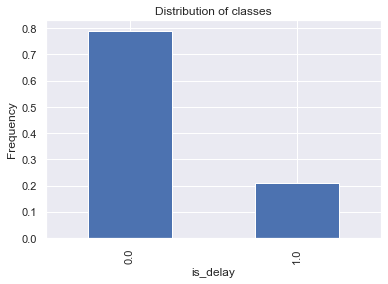

In [89]:
(data.groupby('is_delay').size()/len(data)).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Distribution of classes')
plt.show()

**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

The bar plot illustrates that class 0 (no delay) is significantly more frequent than class 1 (delay). It shows that the number of non-delayed flights (80%) is roughly four times the number of delayed flights (20%).

**Questions**: 

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

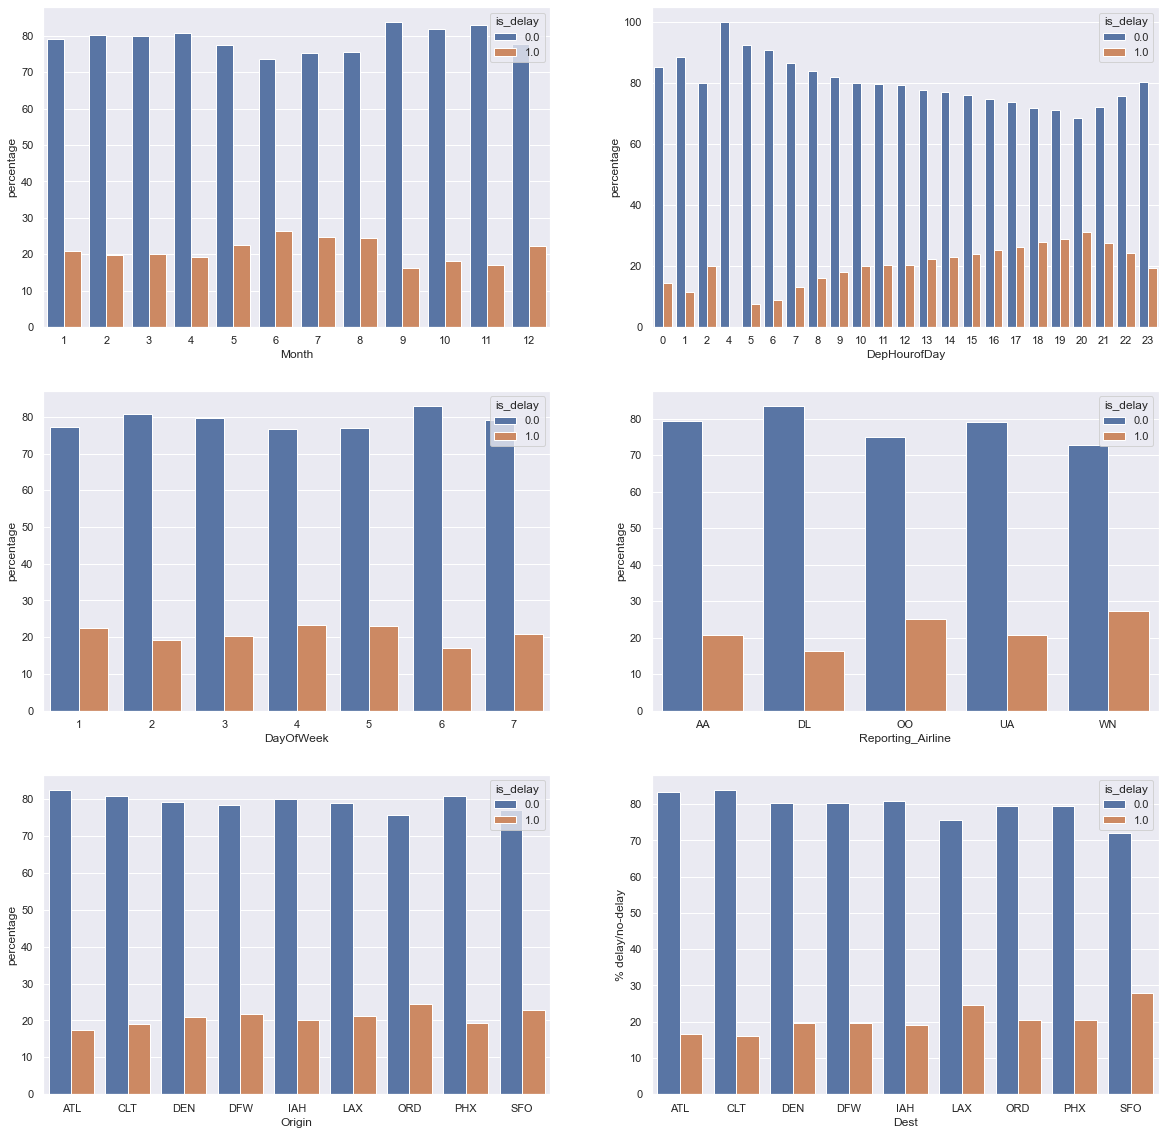

In [128]:
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = data.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')
    

plt.show()

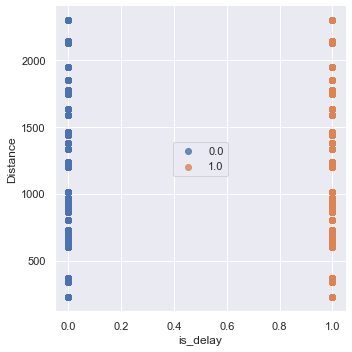

In [91]:
sns.lmplot( x="is_delay", y="Distance", data=data, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()

In [129]:
print(data[['is_delay', 'Distance']])


         is_delay  Distance
0             0.0     689.0
1             0.0     731.0
2             0.0    1199.0
3             0.0    1587.0
4             0.0    1587.0
...           ...       ...
1658125       0.0     602.0
1658126       0.0     967.0
1658127       1.0     967.0
1658128       0.0     967.0
1658129       0.0     967.0

[1635590 rows x 2 columns]


#### Which months have the most delays?
Based on the first bar plot, the months of June, July, and August exhibit the highest percentage of flight delays.


#### What time of the day has the most delays?
Based on the second bar plot, it appears that flights departing between 18:00 and 20:00 (6 PM to 8 PM) have the highest percentage of delays.


#### What day of the week has the most delays?
Based on the third bar plot, it appears that flights departing on Sunday, Wednesday, and Thursday have the highest percentage of delays.


#### Which airline has the most delays?
Based on the fourth bar plot, it appears that WN (Southwest Airlines) has the highest percentage of delays among the airlines shown.


#### Which origin and destination airports have the most delays?
Based on the fifth and sixth bar plots, ORD (O'Hare International Airport) and SFO (San Francisco International Airport) indeed appear to have the highest percentage of delays among the origin and destination airports shown.


#### Is flight distance a factor in the delays?
Based on the scatter plot, there doesn't seem to be a strong and consistent relationship between flight distance and delays. We can see that both short and long flights can experience delays.

### Features

Look at all the columns and what their specific types are.

In [130]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'DepHourofDay', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime'],
      dtype='object')

In [131]:
data.dtypes

Year                          int64
Quarter                       int64
Month                         int64
DayofMonth                    int64
DayOfWeek                     int64
FlightDate           datetime64[ns]
Reporting_Airline            object
Origin                       object
OriginState                  object
Dest                         object
DestState                    object
DepHourofDay                  int64
Cancelled                   float64
Diverted                    float64
Distance                    float64
DistanceGroup                 int64
ArrDelay                    float64
ArrDelayMinutes             float64
is_delay                    float64
AirTime                     float64
dtype: object

Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [174]:
data_orig = data.copy()
data = data[[ 'is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay']]
categorical_columns  = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'DepHourofDay']
for c in categorical_columns:
    data[c] = data[c].astype('category')

To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [175]:
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True) # Enter your code here
data = pd.concat([data, data_dummies], axis = 1)
data.drop(categorical_columns,axis=1, inplace=True)

Check the length of the dataset and the new columnms.

In [136]:
 # Enter your code here
data.shape

(1635590, 94)

In [137]:
# Enter your code here
data.columns

Index(['is_delay', 'Distance', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN',

**Sample Answer:** 
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [176]:
data.rename(columns = {'is_delay':'target'}, inplace=True )

In [139]:
# write code to Save the combined csv file (combined_csv_v1.csv) to your local computer
data.to_csv('combined_csv_v1.csv', index=False)
# note this combined file will be used in part B

# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


### Train test split

In [143]:
# Define features (X) and target variable (y)
X = data.drop(columns=['target'])  # Features
y = data['target']  # Target variable

# write Code here to split data into train, validate and test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f'Train set shape: {X_train.shape}, Validation set shape: {X_val.shape}, Test set shape: {X_test.shape}')

Train set shape: (1308472, 93), Validation set shape: (163559, 93), Test set shape: (163559, 93)


### Baseline classification model

In [158]:
# <write code here>
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)

# Print the evaluation results
print(f'Validation Accuracy: {accuracy:.2f}')

# Calculate precision, recall, F1 score
val_report = classification_report(y_val, y_val_pred, target_names=["No Delay", "Delay"])
print("Classification Report:\n", val_report)

Validation Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

    No Delay       0.79      1.00      0.88    129226
       Delay       0.57      0.00      0.01     34333

    accuracy                           0.79    163559
   macro avg       0.68      0.50      0.45    163559
weighted avg       0.74      0.79      0.70    163559



In [159]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.2f}')

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate precision, recall, F1 score
report = classification_report(y_test, y_pred, target_names=["No Delay", "Delay"])
print("Classification Report:\n", report)

Training Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

    No Delay       0.79      1.00      0.88    129226
       Delay       0.59      0.00      0.01     34333

    accuracy                           0.79    163559
   macro avg       0.69      0.50      0.45    163559
weighted avg       0.75      0.79      0.70    163559



## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

In [147]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_labels, target_predicted):
    
    cm = confusion_matrix(test_labels, target_predicted)

    # Create sns heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted No Delay', 'Predicted Delay'],
                yticklabels=['Actual No Delay', 'Actual Delay'])
    
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    

In [153]:
from sklearn import metrics

def plot_roc(test_labels, target_predicted):
    
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(test_labels, target_predicted)
    
    # Compute AUC
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

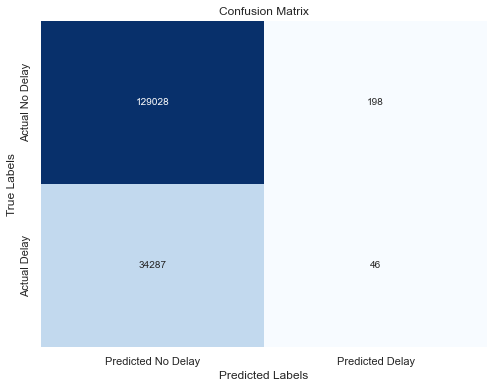

In [150]:
# Enter you code here
plot_confusion_matrix(y_test, y_val_pred)

To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

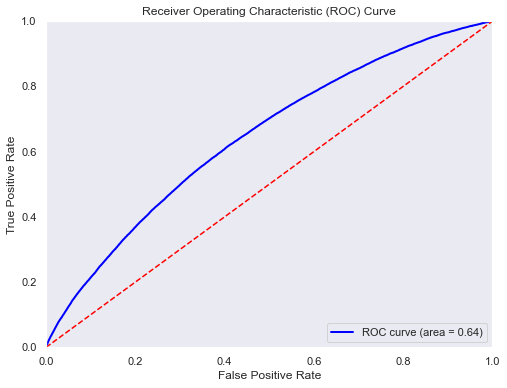

In [154]:
# Enter you code here
target_predicted = model.predict_proba(X_test)[:, 1]  
plot_roc(y_test, target_predicted)

### Key questions to consider:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison? 

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)? 

Use the cells below to answer these and other questions. Insert and delete cells where needed.


#### Question: What can you summarize from the confusion matrix?


The model exhibits strong performance in predicting flights without delays, correctly identifying over 129,000 instances. However, it struggles significantly with predicting delayed flights. Despite correctly identifying 46 delayed flights, it incorrectly classified over 34,000 as non-delayed. This indicates a high false negative rate, meaning the model often fails to detect actual delays. 

### Key questions to consider:

#### 1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison? 
The model demonstrates consistent performance across both training and validation datasets, achieving an accuracy of 0.79 on each. This suggests that the model generalizes well to unseen data and is not overfitting to the training data.


#### 2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 
The model exhibits good overall performance with an accuracy of 0.79, indicating its ability to correctly classify most instances. However, it struggles significantly in accurately predicting flight delays. The model's low precision for the "Delay" class suggests that many of its positive predictions for delays are incorrect. This means that when the model predicts a flight will be delayed, it's often wrong. Additionally, the low recall highlights the model's inability to identify a substantial portion of actual delays, leading to missed predictions.

These differences may exist because the features used to train the model might not be informative enough to distinguish between "Delay" and "No Delay" instances.


#### 3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)? 
While the model exhibits a respectable overall accuracy of 0.79, a deeper analysis of specific metrics is crucial to align with business objectives. To further enhance the model's predictive capabilities, it may be beneficial to explore additional features, experiment with different algorithms, and fine-tune hyperparameters.

# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitLab repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitLab account.


https://github.com/parmamento/airplane_delay_prediction.git

# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance? 
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [214]:
# Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html

holidays_14 = ['2014-01-01',  '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25' ] 
holidays_15 = ['2015-01-01',  '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03', '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25'] 
holidays_16 = ['2016-01-01',  '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29' , '2017-07-04', '2017-09-04' ,'2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28' , '2018-07-04', '2018-09-03' ,'2018-10-08', '2018-11-12','2018-11-22', '2018-12-25']
holidays = holidays_14+ holidays_15+ holidays_16 + holidays_17+ holidays_18


data_orig.rename(columns= {"DayofMonth" : "Day"}, inplace=True)
data_orig['Date'] = pd.to_datetime(data_orig[['Year', 'Month', 'Day']], yearfirst=True)  
data_orig['Date'] = data_orig['Date'].dt.strftime('%Y-%m-%d')  

# create isHoliday column
data_orig['isHoliday'] = data_orig['Date'].isin(holidays)

data_orig.head()

,Year,Quarter,Month,Day,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,...,Date,isHoliday,AWND_O,PRCP_O,SNOW_O,TAVG_O,AWND_D,PRCP_D,SNOW_D,TAVG_D
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,...,2014-01-26,False,33,0,0.0,54.0,30,0,0.0,130.0
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,...,2014-01-26,False,39,0,0.0,136.0,33,0,0.0,54.0
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,...,2014-01-26,False,33,0,0.0,54.0,77,0,0.0,68.0
3,2014,1,1,26,7,2014-01-26,DL,ATL,GA,PHX,...,2014-01-26,False,33,0,0.0,54.0,20,0,1.0,165.0
4,2014,1,1,26,7,2014-01-26,DL,PHX,AZ,ATL,...,2014-01-26,False,20,0,1.0,165.0,33,0,0.0,54.0


Weather data was fetched from https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31.
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

In [15]:
# download data from the link above and place it into the data folder

Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [215]:
weather = pd.read_csv('daily-summaries.csv') # Enter your code here to read 'daily-summaries.csv' file
station = ['USW00023174','USW00012960','USW00003017','USW00094846',
           'USW00013874','USW00023234','USW00003927','USW00023183','USW00013881'] 
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']

### Map weather stations to airport code
station_map = dict(zip(station, airports))
weather['airport'] = weather['STATION'].map(station_map)

print(weather[['STATION', 'airport']].head())

       STATION airport
0  USW00023174     LAX
1  USW00023174     LAX
2  USW00023174     LAX
3  USW00023174     LAX
4  USW00023174     LAX


Create another column called `MONTH` from the `DATE` column.

In [216]:
weather['MONTH'] = weather['DATE'].apply(lambda x: x.split('-')[1])
weather.head()

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport,MONTH
0,USW00023174,2014-01-01,16,0,NaN,NaN,131.0,178.0,78.0,LAX,01
1,USW00023174,2014-01-02,22,0,NaN,NaN,159.0,256.0,100.0,LAX,01
2,USW00023174,2014-01-03,17,0,NaN,NaN,140.0,178.0,83.0,LAX,01
3,USW00023174,2014-01-04,18,0,NaN,NaN,136.0,183.0,100.0,LAX,01
4,USW00023174,2014-01-05,18,0,NaN,NaN,151.0,244.0,83.0,LAX,01


### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [217]:
# Check for missing values in all columns
weather_NA = weather.isna().sum()
print("Missing values for each column:\n", weather_NA)

Missing values for each column:
 STATION       0
DATE          0
AWND          0
PRCP          0
SNOW       5478
SNWD       5478
TAVG         62
TMAX         20
TMIN         20
airport       0
MONTH         0
dtype: int64


In [188]:
weather.SNOW.fillna(int(weather.SNOW.mean()), inplace=True)
weather.SNWD.fillna(int(weather.SNWD.mean()), inplace=True)
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG       62
TMAX       20
TMIN       20
airport     0
MONTH       0
dtype: int64

**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [189]:
idx = np.array([i for i in range(len(weather))])
TAVG_idx = idx[weather['TAVG'].isna()]
TMAX_idx = idx[weather['TMAX'].isna()]
TMIN_idx = idx[weather['TMIN'].isna()]

# Print the indices
print("Indices with missing TAVG:", TAVG_idx)
print("Indices with missing TMAX:", TMAX_idx)
print("Indices with missing TMIN:", TMIN_idx)

Indices with missing TAVG: [ 3956  3957  3958  3959  3960  3961  3962  3963  3964  3965  3966  3967
  3968  3969  3970  3971  3972  3973  3974  3975  3976  3977  3978  3979
  3980  3981  3982  3983  3984  3985  4017  4018  4019  4020  4021  4022
  4023  4024  4025  4026  4027  4028  4029  4030  4031  4032  4033  4034
  4035  4036  4037  4038  4039  4040  4041  4042  4043  4044  4045  4046
  4047 13420]
Indices with missing TMAX: [10763 10764 10765 10766 10767 10768 10769 10770 10771 10772 10773 10774
 10775 10776 10777 10778 10779 10780 10781 10782]
Indices with missing TMIN: [10763 10764 10765 10766 10767 10768 10769 10770 10771 10772 10773 10774
 10775 10776 10777 10778 10779 10780 10781 10782]


### Sample output

```
array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])
```

You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [190]:
weather_impute = weather.groupby(['STATION']).agg({'TAVG':'mean','TMAX':'mean', 'TMIN':'mean' }).reset_index()# Enter your code here
weather_impute.head(2)

,STATION,TAVG,TMAX,TMIN
0,USW00003017,112.931445,190.020263,32.978642
1,USW00003927,198.463308,256.026287,143.678532


Merge the mean data with the weather data.

In [192]:
### get the yesterday's data
weather = pd.merge(weather, weather_impute,  how='left', left_on=['STATION'], right_on = ['STATION'])\
.rename(columns = {'TAVG_y':'TAVG_AVG',
                   'TMAX_y':'TMAX_AVG', 
                   'TMIN_y':'TMIN_AVG',
                   'TAVG_x':'TAVG',
                   'TMAX_x':'TMAX', 
                   'TMIN_x':'TMIN'})

Check for missing values again.

In [193]:
weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
weather.TMIN[TMIN_idx] = weather.TMIN_AVG[TMIN_idx]
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG        0
TMAX        0
TMIN        0
airport     0
MONTH       0
TAVG_AVG    0
TMAX_AVG    0
TMIN_AVG    0
dtype: int64

Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [194]:
weather.drop(columns=['STATION','MONTH','TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX' ,'TMIN', 'SNWD'],inplace=True)

Add the origin and destination weather conditions to the dataset.

In [195]:
### Add origin weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Origin'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_O','PRCP':'PRCP_O', 'TAVG':'TAVG_O', 'SNOW': 'SNOW_O'})\
.drop(columns=['DATE','airport'])

### Add destination weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Dest'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_D','PRCP':'PRCP_D', 'TAVG':'TAVG_D', 'SNOW': 'SNOW_D'})\
.drop(columns=['DATE','airport'])

**Note**: It is always a good practice to check nulls/NAs after joins.

In [196]:
sum(data.isna().any())

0

In [197]:
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'Day', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'DepHourofDay', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'Date',
       'isHoliday', 'AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O', 'AWND_D', 'PRCP_D',
       'SNOW_D', 'TAVG_D'],
      dtype='object')

Convert the categorical data into numerical data using one-hot encoding.

In [201]:
data = data_orig.copy()
data = data[['is_delay', 'Year', 'Quarter', 'Month', 'Day', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay','isHoliday', 'AWND_O', 'PRCP_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]


categorical_columns  = ['is_delay', 'Year', 'Quarter', 'Month', 'Day', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'isHoliday']
for c in categorical_columns:
    data[c] = data[c].astype('category')

In [202]:
 data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'Day', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'isHoliday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)

### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

Check the new columns.

In [203]:
data.columns

Index(['is_delay', 'Distance', 'DepHourofDay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_6', 'Day_7', 'Day_8', 'Day_9',
       'Day_10', 'Day_11', 'Day_12', 'Day_13', 'Day_14', 'Day_15', 'Day_16',
       'Day_17', 'Day_18', 'Day_19', 'Day_20', 'Day_21', 'Day_22', 'Day_23',
       'Day_24', 'Day_25', 'Day_26', 'Day_27', 'Day_28', 'Day_29', 'Day_30',
       'Day_31', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5',
       'DayOfWeek_6', 'DayOfWeek_7', 'Reporting_Airline_DL',
       'Reporting_Airline_OO', 'Reporting_Airline_UA', 'Reporting_Airline_WN',
       'Origin_CLT', 'Origin_DEN', 'Origin_DFW', 'Origin_IAH', 'Origin_LAX',
       'Origin_ORD', 'Orig

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

Rename the `is_delay` column to `target` again. Use the same code as before.

In [204]:
 data.rename(columns = {'is_delay':'target'}, inplace=True )

In [225]:
data.shape

(1635590, 86)

In [205]:
# write code to Save the new combined csv file (combined_csv_v2.csv) to your local computer
data.to_csv('combined_csv_v2.csv', index=False)
# note this combined file will be also used in part B

Create the training and testing sets again.

In [226]:
# Enter your code here

# Define features (X) and target variable (y)
X = data.drop(columns=['target'])  # Features
y = data['target']  # Target variable

X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp2, y_temp2, test_size=0.5, random_state=42, stratify=y_temp2)

# Print the shapes of the datasets
print(f'Train set shape: {X_train2.shape}, Validation set shape: {X_val2.shape}, Test set shape: {X_test2.shape}')

Train set shape: (1308472, 85), Validation set shape: (163559, 85), Test set shape: (163559, 85)


### New baseline classifier

Now, see if these new features add any predictive power to the model.

In [227]:
# Instantiate another logistic regression model
classifier2 = LogisticRegression(max_iter=1000)

In [228]:
# Fit the model on the training data
classifier2.fit(X_train2, y_train2)

# Predict on the validation set
y_val_pred = classifier2.predict(X_val2)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val2, y_val_pred)
print(f'Classifier 2 Validation Accuracy: {val_accuracy:.2f}')

# Calculate precision, recall, F1 score for the validation set
val_report = classification_report(y_val2, y_val_pred, target_names=["No Delay", "Delay"])
print("Classifier 2 Validation Classification Report:\n", val_report)

# Predict on the training set
y_train_pred = classifier2.predict(X_train2)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train2, y_train_pred)
print(f'Classifier 2 Training Accuracy: {train_accuracy:.2f}')

# Predict on the test set
y_pred = classifier2.predict(X_test2)

# Calculate precision, recall, F1 score for the test set
test_report = classification_report(y_test2, y_pred, target_names=["No Delay", "Delay"])
print("Classifier 2 Test Classification Report:\n", test_report)


Classifier 2 Validation Accuracy: 0.79
Classifier 2 Validation Classification Report:
               precision    recall  f1-score   support

    No Delay       0.80      0.99      0.88    129226
       Delay       0.55      0.06      0.11     34333

    accuracy                           0.79    163559
   macro avg       0.67      0.52      0.49    163559
weighted avg       0.75      0.79      0.72    163559

Classifier 2 Training Accuracy: 0.79
Classifier 2 Test Classification Report:
               precision    recall  f1-score   support

    No Delay       0.80      0.99      0.88    129226
       Delay       0.56      0.06      0.11     34333

    accuracy                           0.79    163559
   macro avg       0.68      0.52      0.49    163559
weighted avg       0.75      0.79      0.72    163559



Perform the evaluaion as you have done with the previous model and plot/show the same metrics

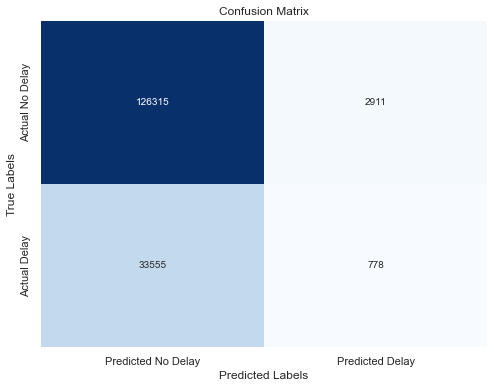

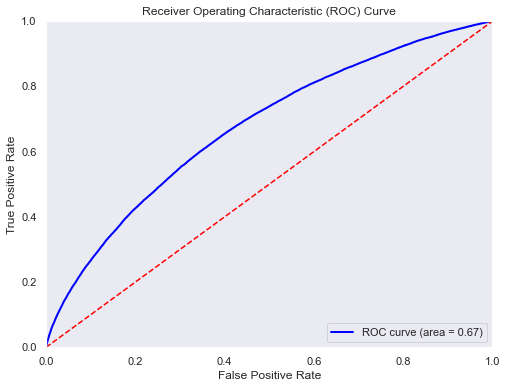

In [229]:
# Call the plotting functions with the results from classifier2
plot_confusion_matrix(y_test2, y_val_pred)

# Get predicted probabilities for ROC curve
target_predicted_proba = classifier2.predict_proba(X_test2)[:, 1]  
plot_roc(y_test2, target_predicted_proba)

#### Question: did you notice a difference by adding the extra data on the results?

Both Classifier 1 and Classifier 2 exhibit similar overall performance, with both models achieving an accuracy of approximately 0.79. While both classifiers perform well on the majority class ("No Delay"), they struggle with the minority class ("Delay"). Classifier 1 has a higher false positive rate, meaning it often incorrectly predicts delays. Conversely, Classifier 2 has a lower false positive rate but still suffers from a high false negative rate, indicating difficulty in correctly identifying actual delays. Although Classifier 2 has a slightly higher AUC score, the difference is not significant. To improve the performance of both classifiers, addressing the class imbalance and exploring advanced techniques like feature engineering, hyperparameter tuning, and ensemble methods is recommended.

# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem. 
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account 
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the prblem statement.

https://public.tableau.com/views/AirplaneDelaysPrediction/Dashboard2?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
3. What were some of the biggest challenges you encountered throughout this project?
4. What were the three most important things you learned about machine learning while completing this project?

#### 1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?

While the model achieved a respectable accuracy of 0.79, it still falls short of the initially proposed business metric 85%. To improve the model's performance we would explore other algorithms such as Random Forest, XGBoost, or Support Vector Machines (SVM) to improve predictive accuracy and robustness.

#### 2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?

While the model's performance improved marginally, the changes were evident in the confusion matrix and ROC curve analysis. Classifier 1 exhibited a higher false positive rate, while Classifier 2 demonstrated a lower false positive rate but a higher false negative rate. Although Classifier 2 had a slightly higher AUC score, the overall improvement was not substantial.

Feature engineering, particularly the incorporation of time-based, weather-related, and airline-specific features, proved to be a significant factor in enhancing the model's performance.

#### 3. What were some of the biggest challenges you encountered throughout this project?

The imbalanced nature of the dataset presented a significant challenge, as the model exhibited a bias towards the majority class. Additionally, addressing data quality issues and handling missing values were critical steps in the preprocessing phase to ensure the model's accuracy and reliability.

#### 4. What were the three most important things you learned about machine learning while completing this project?

1. Data Quality is Essential: High-quality data serves as the fundamental building block for robust machine learning models.

2. The Power of Feature Engineering: The creation of informative features can significantly enhance model performance and predictive accuracy.

3. The Importance of Comprehensive Evaluation: A thorough understanding of various evaluation metrics, including accuracy, precision, recall, F1-score, and the ROC curve, is crucial for a comprehensive assessment of model performance.